<a href="https://colab.research.google.com/github/Ayush310803/ViT/blob/main/Movenet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [54]:
!pip install -q imageio
!pip install -q opencv-python
!pip install -q git+https://github.com/tensorflow/docs

  Preparing metadata (setup.py) ... done


In [55]:
import tensorflow as tf
import tensorflow_hub as hub
import cv2
import numpy as np

In [56]:
model_name = "movenet_lightning"
if "lightning" in model_name:
    module = hub.load("https://tfhub.dev/google/movenet/singlepose/lightning/4")
    input_size = 192
else:
    module = hub.load("https://tfhub.dev/google/movenet/singlepose/thunder/4")
    input_size = 256
movenet = module.signatures['serving_default']

KEYPOINT_EDGES = [
    (0, 1), (0, 2), (1, 3), (2, 4), (0, 5), (0, 6), (5, 6),
    (5, 7), (7, 9), (6, 8), (8, 10), (5, 11), (6, 12), (11, 12),
    (11, 13), (13, 15), (12, 14), (14, 16)
]

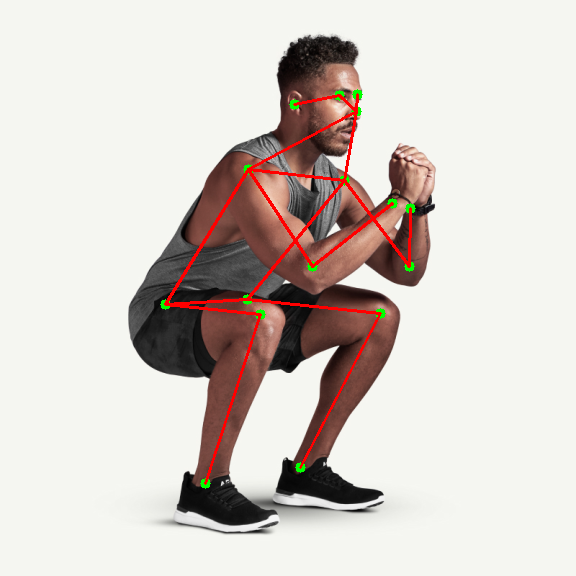

Image saved to output_image.jpg


In [57]:
image_path = "/content/Bodyweight-Squat.jpg"
image = cv2.imread(image_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

image_resized = cv2.resize(image, (input_size, input_size))

image_resized = image_resized / 255.0
image_resized = (image_resized * 255).astype(np.uint8)
image_resized = tf.convert_to_tensor(image_resized, dtype=tf.int32)

image_resized = tf.expand_dims(image_resized, axis=0)

outputs = movenet(image_resized)
keypoints = outputs['output_0'].numpy()

height, width, _ = image.shape
keypoints_rescaled = keypoints[0] * [height, width, 1]

for keypoint in keypoints_rescaled[0]:
    y, x, confidence = keypoint
    if confidence > 0.3:
        cv2.circle(image, (int(x), int(y)), 5, (0, 255, 0), -1)

for edge in KEYPOINT_EDGES:
    y1, x1, confidence1 = keypoints_rescaled[0][edge[0]]
    y2, x2, confidence2 = keypoints_rescaled[0][edge[1]]
    if confidence1 > 0.3 and confidence2 > 0.3:
        cv2.line(image, (int(x1), int(y1)), (int(x2), int(y2)), (255, 0, 0), 2)

image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)

from google.colab.patches import cv2_imshow
cv2_imshow(image)

output_path = "output_image.jpg"
cv2.imwrite(output_path, image)
print(f"Image saved to {output_path}")

# MoveNet: Real-Time Pose Estimation

## 🔹 **What is MoveNet?**  
MoveNet is a **lightweight, real-time human pose estimation model** developed by **Google** and available on **TensorFlow Hub**. It detects **17 key points** (like head, shoulders, elbows, wrists, hips, knees, and ankles) on the human body.  

### **Key Features:**  
✅ **Ultra-fast**: Designed for real-time applications  
✅ **Highly accurate**: Works well even in low-resolution images  
✅ **Two versions:**  
   - **MoveNet Lightning** (smaller, optimized for mobile and edge devices)  
   - **MoveNet Thunder** (larger, higher accuracy for desktop and cloud)  
✅ **Works on CPU & GPU**  

---

## 🔍 **How MoveNet Works Internally**  
MoveNet follows a **single-stage pose detection pipeline** for **fast and accurate predictions**. Here’s how it works:  

### **1️⃣ Input Image Processing**  
- The input image is resized to **192x192** (Lightning) or **256x256** (Thunder)  
- Normalization is applied for better model performance  
- The image is passed as a tensor to the neural network  

---

### **2️⃣ Backbone Network (Feature Extraction)**  
- Uses a **MobileNetV2-like CNN architecture** to extract features from the image  
- The model creates a **feature map** that highlights potential body parts  

---

### **3️⃣ Heatmaps & Offset Prediction**  
- The model outputs **heatmaps** where each pixel represents a keypoint probability  
- It also predicts **offsets** to refine the exact keypoint location  

---

### **4️⃣ Keypoint Refinement & Post-Processing**  
- **Keypoints are adjusted** based on the detected heatmaps  
- **Confidence scores** are assigned to each keypoint  
- Uses **non-maximum suppression (NMS)** to remove redundant detections  

---

### **5️⃣ Output (Pose Estimation Results)**  
The model returns:  
- **17 Keypoints** (x, y coordinates + confidence scores)  
- **Real-time tracking** for fast applications  

👉 **Example Output (for a single person):**  
```python
{
  "keypoints": [
    [0.45, 0.76, 0.98],  # Nose
    [0.41, 0.72, 0.95],  # Left Eye
    [0.49, 0.72, 0.94],  # Right Eye
    ...
    [0.33, 0.85, 0.90],  # Left Ankle
    [0.61, 0.85, 0.89]   # Right Ankle
  ]
}
```

---

## **MoveNet vs Other Pose Estimation Models**
| Model               | Speed  | Accuracy | Suitable For          |
|--------------------|--------|----------|----------------------|
| **MoveNet Lightning** | 🔥🔥🔥 | ✅✅ | Mobile/Edge Devices |
| **MoveNet Thunder**  | 🔥🔥 | ✅✅✅ | Cloud/Desktop       |
| OpenPose            | 🔥 | ✅✅✅ | High-accuracy applications |
| MediaPipe          | 🔥🔥🔥 | ✅✅ | Real-time mobile apps |

---

## **Where is MoveNet Used?**  
🚀 **Fitness apps** (detecting yoga poses, workouts)  
🎮 **Augmented Reality (AR)** (virtual try-on, motion tracking)  
📹 **Video Analytics** (gesture recognition, sign language detection)  
👨‍⚕️ **Healthcare & Rehabilitation** (posture correction, physiotherapy)  

